https://www.wired.com/2011/01/linear-regression-with-pylab/

In [19]:
import pickle

def getFileName(dataID):
  return 'Dic' + str(dataID)

def createPickleWithDic(dataID, d):
    fileName = getFileName(dataID)
    file = open(fileName, 'wb+')
    pickle.dump(d, file)
    file.close()
    return
    
def createPickle(dataID):
  d = createDictionary(dataID)
  fileName = getFileName(dataID)
  file = open(fileName, 'wb+')
  pickle.dump(d, file)
  file.close()
  return

def updatePickle(dataID):
    #not sure if this overwrites it, or if you need to clear it first
    createPickle(dataID)

    
def getDicFromPickle(dataID):
  fileName = getFileName(dataID)
  file2 = open(fileName, 'rb')
  new_d = pickle.load(file2)
  file2.close()
  return new_d

In [20]:
dic2 = getDicFromPickle('cleanData')
import math

dataX = []
dataY = []
logdataY = []

for key in dic2:
    for i in range(len(dic2[key])):
        dataX += [i]
        dataY += [dic2[key][i]]
        if dic2[key][i] == 0:
            logdataY += [0]
        else:
            logdataY += [math.log(dic2[key][i])]
        
        
        
        
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
import numpy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression

from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
 
stop_words = (stop_words.ENGLISH_STOP_WORDS)

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import add_dummy_feature

from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

# Class, for use in pipelines, to select certain columns from a DataFrame and convert to a numpy array
# From A. Geron: Hands-On Machine Learning with Scikit-Learn & TensorFlow, O'Reilly, 2017
# Modified by Derek Bridge to allow for casting in the same ways as pandas.DatFrame.astype
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names, dtype=None):
        self.attribute_names = attribute_names
        self.dtype = dtype
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_selected = X[self.attribute_names]
        if self.dtype:
            return X_selected.astype(self.dtype).values
        return X_selected.values
    
# Class, for use in pipelines, to binarize nominal-valued features (while avoiding the dummy variabe trap)
# By Derek Bridge, 2017
class FeatureBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, features_values):
        self.features_values = features_values
        self.num_features = len(features_values)
        self.labelencodings = [LabelEncoder().fit(feature_values) for feature_values in features_values]
        self.onehotencoder = OneHotEncoder(sparse=False,
            n_values=[len(feature_values) for feature_values in features_values])
        self.last_indexes = np.cumsum([len(feature_values) - 1 for feature_values in self.features_values])
    def fit(self, X, y=None):
        for i in range(0, self.num_features):
            X[:, i] = self.labelencodings[i].transform(X[:, i])
        return self.onehotencoder.fit(X)
    def transform(self, X, y=None):
        for i in range(0, self.num_features):
            X[:, i] = self.labelencodings[i].transform(X[:, i])
        onehotencoded = self.onehotencoder.transform(X)
        return np.delete(onehotencoded, self.last_indexes, axis=1)
    def fit_transform(self, X, y=None):
        onehotencoded = self.fit(X).transform(X)
        return np.delete(onehotencoded, self.last_indexes, axis=1)
    def get_params(self, deep=True):
        return {"features_values" : self.features_values}
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            self.setattr(parameter, value)
        return self

In [21]:
def f(i):
    return 2*i+7

x = [1,5,3,6,3,2,6,7,4,2,7,8,3]
y = []

for i in x:
    y+= [f(i)]
    


In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [23]:
d = {'col1': [x], 'col2' : [y]}

In [24]:
df = pd.DataFrame(data=d)

In [25]:
df

,col1,col2
0,"[1, 5, 3, 6, 3, 2, 6, 7, 4, 2, 7, 8, 3]","[9, 17, 13, 19, 13, 11, 19, 21, 15, 11, 21, 23..."


In [26]:
y

[9, 17, 13, 19, 13, 11, 19, 21, 15, 11, 21, 23, 13]

In [27]:
df.dtypes

col1    object
col2    object
dtype: object

In [28]:
xs = pd.Series(x)
ys = pd.Series(y)

In [29]:
d = {'x1' : xs, 'y1' : ys}

In [30]:
df = pd.DataFrame(d)

In [31]:
df

,x1,y1
0,1,9
1,5,17
2,3,13
3,6,19
4,3,13
5,2,11
6,6,19
7,7,21
8,4,15
9,2,11


In [32]:
(df.assign(tot = d['x1'] + d['y1']).head())

,x1,y1,tot
0,1,9,10
1,5,17,22
2,3,13,16
3,6,19,25
4,3,13,16


In [33]:
df = (df.assign(tot = d['x1'] + d['y1']))

In [34]:
from sklearn.linear_model import LinearRegression
#X = df.drop('tot', axis = 1)
#y= df['tot']
y= df['y1']
X = df.drop('y1', axis = 1)


lm = LinearRegression()

In [35]:
lm.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

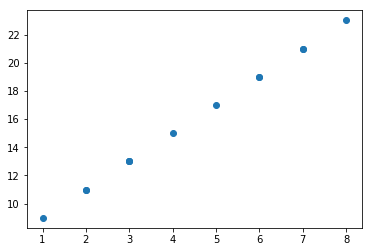

In [37]:
plt.scatter(df.x1, df.y1)

In [38]:
lm.predict(X)

array([  9.,  17.,  13.,  19.,  13.,  11.,  19.,  21.,  15.,  11.,  21.,
        23.,  13.])

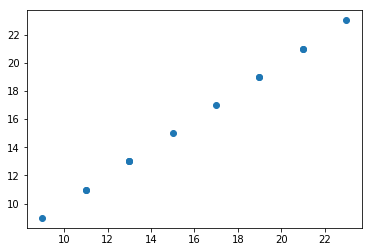

In [39]:
plt.scatter(df.y1, lm.predict(X))

In [40]:
meanSquaredError = np.mean((df.y1 - lm.predict(X)))

In [41]:
meanSquaredError

2.7328566760003855e-16

In [42]:
lm.predict(7)

ValueError: shapes (1,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [ ]:
lm.fit_intercept

In [ ]:
lm.get_params

In [ ]:
(m,b) = polyfit(dataX,logdataY,1)
print(m,b)

c:\users\brian\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


ValueError: Expected 2D array, got 1D array instead:
array=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

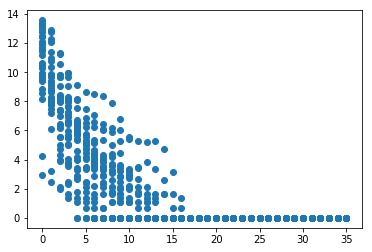

In [43]:
x = dataX
y = logdataY

xs = pd.Series(x)
ys = pd.Series(y)
d = {'x1' : xs, 'y1' : ys}
df = pd.DataFrame(d)

y= df['y1']
X = df.drop('y1', axis = 1)

xPred = []
for i in range(36):
    xPred += [i]

xPred = pd.Series(xPred)
xPred.reshape(-1, 1)

lm = LinearRegression()
lm.fit(X, y)
lm.get_params()
plt.scatter(df.x1, df.y1)
lm.predict(X)
plt.scatter(df.y1, lm.predict(xPred))
#meanSquaredError = np.mean((df.y1 - lm.predict(X)))

In [ ]:
X
y

In [44]:
from pylab import *

In [45]:
(m, b) = polyfit(x,y,1)
print(m, b)

-0.198413355505 5.00275002369


In [46]:
yp = ployval([m,b], x)

NameError: name 'ployval' is not defined

In [47]:
dic2

{1: [171471,
  87250.0,
  3029,
  3323.0,
  3617,
  5654,
  5090,
  4369,
  2679,
  885,
  249,
  30,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 3: [439986,
  11597,
  3664,
  1250,
  357,
  154,
  72,
  26,
  13,
  7,
  4,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 4: [111581,
  2400,
  469,
  236,
  290,
  88,
  34,
  11,
  5,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 5: [178594,
  1783,
  248,
  56,
  17,
  8,
  4,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 6: [488811,
  11959,
  1525,
  713,
  424,
  499,
  728,
  404.5,
  81,
  88,
  25,
  5,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [ ]:
data = pd.DataFrame({'data': [], 'type': []})
rows = []
for message in questions:
    rows.append({'message':  message, 'text': message['messageBody'], 'type': 1})
                 

for message in nonQuestions:
    rows.append({'message':  message, 'text': message['messageBody'], 'type': 0})
    

data_frame = pd.DataFrame(rows)
data = data.append(data_frame)

data = data.take(np.random.permutation(len(data)))
data.reset_index(drop = True, inplace = True)


In [48]:
dic = dic2
values = [] # Values are the values and their percentage decrease
valuePairs = []
for key in dic:
    case = dic[key]
    for i in range(1, len(case) -1):
        if (case[i] not in [None, 0] and case[i+1]!= None and case[i] > case[i+1]):
            if case[i] < 5000:
                values += [(case[i], (case[i]-case[i+1])/case[i])]
            
                valuePairs += [(case[i], case[i+1])]

val = [] #value
pcDec = [] #percentage change
value1 = []
value2 = []

for v in values:
    val += [[v[0]]]
    pcDec += [[v[1]]]

for v in valuePairs:
    value1 += [[v[0]]]
    value2 += [[v[1]]]

In [49]:
data = pd.DataFrame({'val1': [], 'val2': []})
rows = []
for values in valuePairs:
    rows.append({'val1':  values[0], 'val2':  values[1]})
 
    

data_frame = pd.DataFrame(rows)
data = data.append(data_frame)

data = data.take(np.random.permutation(len(data)))
data.reset_index(drop = True, inplace = True)


In [56]:
pipeline = Pipeline([("selector", DataFrameSelector(["val1"]))])

linreg = LinearRegression()
y = data["val2"].values
X = pipeline.transform(data)
linreg.fit(X, y)
linreg.predict(100)

array([ 32.7892295])

In [52]:
pipeline = Pipeline([
    ("estimator", LogisticRegression())])

pipeline.fit(data['val1'].values, data['val2'].values)

k_fold = KFold(n=len(data), n_folds=6)
scores = []
confusion = numpy.array([[0, 0], [0, 0]])


for train, test in k_fold:
    train_text = data.iloc[train]['header'].values
    train_y = data.iloc[train]['type'].values

    test_text = data.iloc[test]['header'].values
    test_y = data.iloc[test]['type'].values

    pipeline.fit(train_text, train_y)
    predictions = pipeline.predict(test_text)

    confusion += confusion_matrix(test_y, predictions)
    score = f1_score(test_y, predictions, pos_label=1)
    scores.append(score)

print("Scores: ", scores)
confusion

ValueError: Expected 2D array, got 1D array instead:
array=[  8.00000000e+00   2.30000000e+01   2.37600000e+03   1.09500000e+02
   4.00000000e+00   4.90000000e+01   4.08000000e+02   3.60000000e+01
   1.20000000e+01   2.49000000e+02   1.02600000e+03   2.00000000e+00
   2.00000000e+00   1.20000000e+01   2.51000000e+02   3.10000000e+01
   1.80000000e+01   7.00000000e+00   2.80000000e+01   1.30000000e+01
   7.00000000e+00   1.70000000e+01   1.45000000e+02   7.20000000e+01
   1.10000000e+01   3.66400000e+03   2.13000000e+02   5.00000000e+00
   4.80000000e+01   3.00000000e+01   3.98000000e+03   3.41400000e+03
   6.52000000e+02   5.07000000e+02   2.60000000e+01   1.82000000e+02
   4.00000000e+00   4.36900000e+03   1.80000000e+01   1.60000000e+01
   8.00000000e+00   4.00000000e+00   4.00000000e+00   2.00000000e+00
   8.85000000e+02   2.67900000e+03   4.00000000e+00   1.66500000e+02
   1.15900000e+03   2.23000000e+02   1.40000000e+01   6.00000000e+00
   1.45000000e+02   2.72950000e+03   1.72900000e+03   5.00000000e+00
   2.70000000e+01   3.00000000e+01   6.00000000e+00   1.10000000e+01
   3.00000000e+00   4.04500000e+02   3.00000000e+00   2.10600000e+03
   3.00000000e+00   3.40000000e+01   7.13000000e+02   1.10000000e+01
   1.25000000e+03   7.90000000e+02   3.25000000e+02   1.33600000e+03
   3.40000000e+01   1.52000000e+02   6.30000000e+01   7.50000000e+01
   4.69000000e+02   3.00000000e+00   2.90000000e+01   5.50000000e+01
   6.44000000e+02   3.00000000e+01   7.40000000e+01   8.00000000e+00
   1.64400000e+03   5.00000000e+00   1.90000000e+01   5.30000000e+01
   5.79000000e+02   3.13000000e+02   1.10000000e+01   2.40000000e+01
   1.96000000e+02   8.20000000e+01   2.09000000e+02   4.61200000e+03
   8.80000000e+01   8.80000000e+01   5.00000000e+00   3.00000000e+00
   4.50000000e+01   5.90000000e+01   3.00000000e+00   1.97000000e+02
   6.50000000e+01   3.57000000e+02   4.00000000e+00   3.80000000e+01
   7.22000000e+02   2.00000000e+00   1.50000000e+01   5.00000000e+00
   2.40000000e+03   5.00000000e+00   8.21000000e+02   5.00000000e+00
   2.00000000e+00   1.12000000e+02   3.00000000e+00   1.80000000e+01
   7.00000000e+00   4.00000000e+00   4.50000000e+01   2.79600000e+03
   2.90000000e+02   2.64000000e+02   3.01000000e+03   1.10400000e+03
   1.67200000e+03   7.28000000e+02   8.00000000e+00   3.56800000e+03
   6.76000000e+02   4.30000000e+01   6.20000000e+01   3.80000000e+01
   9.00000000e+00   1.70000000e+01   1.42500000e+03   8.00000000e+00
   2.40000000e+01   2.52000000e+02   8.00000000e+00   8.00000000e+00
   5.60000000e+01   4.90000000e+01   1.92000000e+02   2.55500000e+03
   2.95000000e+02   3.00000000e+00   2.48000000e+02   2.00000000e+00
   2.00000000e+00   2.01000000e+02   3.94000000e+02   1.13000000e+02
   1.78300000e+03   1.10000000e+02   1.30000000e+01   1.53000000e+02
   3.00000000e+00   3.90000000e+01   1.20000000e+01   3.00000000e+00
   4.24300000e+03   2.27000000e+02   1.54000000e+02   5.00000000e+01
   6.14000000e+02   4.73000000e+02   3.88000000e+02   1.60000000e+02
   2.00000000e+00   4.10000000e+01   1.63000000e+02   2.79200000e+03
   3.32700000e+03   4.50000000e+02   3.70900000e+03   6.00000000e+00
   3.66000000e+02   5.00000000e+00   8.70000000e+01   5.00000000e+00
   4.40000000e+01   1.70000000e+01   3.60000000e+01   3.00000000e+00
   1.00000000e+01   5.00000000e+00   1.94300000e+03   9.69000000e+02
   3.30000000e+01   1.52500000e+03   1.97900000e+03   5.04000000e+02
   3.00000000e+00   5.80000000e+01   2.00000000e+01   2.75000000e+01
   8.00000000e+00   6.00000000e+00   1.07000000e+02   6.20000000e+02
   5.20000000e+01   9.90000000e+01   5.00000000e+00   4.04100000e+03
   1.40000000e+01   5.57500000e+02   6.30000000e+01   6.00000000e+00
   8.00000000e+00   4.00000000e+00   6.12000000e+02   2.50000000e+01
   9.00000000e+00   3.00000000e+00   2.60000000e+01   3.25000000e+01
   3.00000000e+00   1.20000000e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [51]:
data

,val1,val2
0,8.0,4.0
1,23.0,4.0
2,2376.0,112.0
3,109.5,23.0
4,4.0,3.0
5,49.0,10.0
6,408.0,227.0
7,36.0,24.0
8,12.0,7.0
9,249.0,30.0
